# KoNLPy란?

## 1. KoNLPy 개념

KoNLPy를 알아 보기에 앞서 NLP라는 개념에 대해 먼저 알아보자.



NLP (Natural Language Processing : 자연어처리)는 텍스트에서 의미있는 정보를 분석, 추출하고 이해하는 일련의 기술집합이다.NLP는 컴퓨터와 인간 언어 사이의 상호 작용하는 기술로 인공지능의 핵심 기능 중 하나이다.
자연어처리가 되면, 컴퓨터는 이 처리된 정보를 바탕으로 음성 인식, 내용 요약, 번역, 감성 분석, 텍스트 분류 작업을 할 수 있다. 

우리 일상에서 자주 쓰이는 애플의 Siri 나 구글 번역기가 NLP의 대표적인 응용 사례이다.



아름답지만 다소 복잡하기도한 한국어는 전세계에서 13번째로 많이 사용되는 언어이다. 복잡미묘한 한국어 텍스트에서 유용한 특성을 추출하기 위해 그 동안 수많은 한국어 정보처리 도구가 개발되었다.

한국어 텍스트를 분석할 때 가장 기본적으로 행해야하는 것은 형태소 분석이다.
형태소를 나눈다면 크게 명사, 동사, 형용사, 부사, 조사, 접사, 관형사, 어미 등으로 나뉜다.
한국어를 처리 할때는 대체로 KoNLPy(코엔엘파이) 라이브러리를 많이 사용한다.


즉 KoNLPy(코엔엘파이)는 한국어 정보처리를 위한 파이썬 패키지이다. KoNLPy는 파이썬 프로그래밍 언어로 사용할 수 있도록 만들어졌다. 파이썬이 간결하고 우아한 문법구조, 강력한 스트링 연산 기능을 가지고 있을 뿐 아니라 크롤링, 웹프로그래밍, 그리고 데이터 분석을 수행할 수 있는 다양한 패키지를 사용할 수 있는 언어이기 때문이다.

## 2. KoNLPy 설치하기 (우분투에서 설치하는 방법)

In [11]:
#$ sudo apt-get install g++ openjdk-7-jdk    # Install Java 1.7+ 설치
#$ sudo apt-get install python-dev; pip install konlpy       # Python 2.x
#$ sudo apt-get install python3-dev; pip3 install konlpy     # Python 3.x

# No JVM shared library file (libjvm.so) found. Try setting up the JAVA_HOME environment variable properly.
# -> 위와 같은 오류 발생 시
# sudo apt install default-jdk 입력 후 아래 코드 입력
#$ sudo apt-get install python3-dev; pip3 install konlpy     # Python 3.x

## 3. KoNLPy 예제

KoNLPy는 다음과 같은 다양한 형태소 분석, 태깅 라이브러리를 파이썬에서 쉽게 사용할 수 있도록 모아놓았다.

- Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.

- Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.

- Komoran: 코모란. Shineware에서 개발.

- Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.

- Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.

이번 블로그에선 Kkma(꼬꼬마) 클래스를 이용해 간단한 예제를 실행해 보자.

다른 클래스들도 다음과 같은 메서드를 공통적으로 제공한다.

- nouns : 명사 추출

- morphs : 형태소 추출

- pos : 품사 부착



In [4]:
from konlpy.tag import Kkma
from konlpy.utils import pprint

필요한 라이브러리를 먼저 임포트 한다.

In [5]:
kkma = Kkma()
pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))

['네, 안녕하세요.', '반갑습니다.']


In [10]:
pprint(kkma.nouns(u'질문이나 건의사항은 깃헙이나 블로그에 남겨주세요.'))

['질문', '건의', '건의사항', '사항', '깃헙', '로그']


문자열에서 명사만 추출하려면 위와 같이 noun 명령을 사용한다.

## 4. 한국어 말뭉치를 이용한 예제

#### 1. 말뭉치 불러오기

KoNLPy에서는 대한민국 헌법 말뭉치인 kolaw와 국회법안 말뭉치인 kobill을 제공한다. 각 말뭉치가 포함하는 파일의 이름은 fields 메서드로 알 수 있고 open 메서드로 해당 파일의 텍스트를 읽어들인다.

In [13]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [14]:
c = kolaw.open('constitution.txt').read()
print(c[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로


In [15]:
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [16]:
d = kobill.open('1809890.txt').read()
print(d[:40])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호


#### 2. 형태소 분석하기

- 명사 추출

문자열에서 명사만 추출하려면 noun 명령을 사용한다.

In [17]:
kkma.nouns(c[:40])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동']

- 형태소 추출

명사 뿐 아니라 모든 품사의 형태소를 알아내려면 morphs라는 명령을 사용한다.



In [18]:
kkma.morphs(c[:40])

['대한민국',
 '헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛나',
 '는',
 '우리',
 '대하',
 'ㄴ',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

- 품사 부착

pos 명령을 사용하게 되면 품사 부착을 한다.

In [20]:
kkma.pos(c[:40])

[('대한민국', 'NNG'),
 ('헌법', 'NNG'),
 ('유구', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKM'),
 ('빛나', 'VV'),
 ('는', 'ETD'),
 ('우리', 'NNM'),
 ('대하', 'VV'),
 ('ㄴ', 'ETD'),
 ('국민', 'NNG'),
 ('은', 'JX'),
 ('3', 'NR'),
 ('·', 'SP'),
 ('1', 'NR'),
 ('운동', 'NNG'),
 ('으로', 'JKM')]

부착되는 품사 태그의 기호와 의미는 tagset 속성으로 확인할 수 있다.

In [21]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

#### 3. NLTK

koNLPy의 형태소 분석기와 NLTK의 Text 클래스를 결합하여 NLTK 기능을 사용할 수도 있다.
NLTK(Natural Language Toolkit) 패키지는 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지다. 다양한 기능 및 예제를 가지고 있으며 실무 및 연구에서도 많이 사용된다.

In [32]:
# 한글 폰트 깨짐 방지 코드
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

- NLTK와 Text 클래스 결합

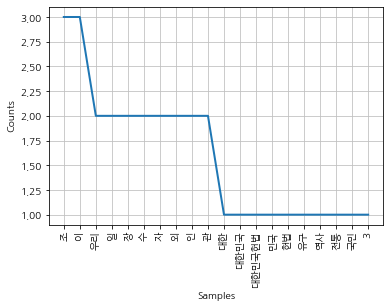

In [33]:
import matplotlib.pyplot as plt
from nltk import Text

kolaw = Text(kkma.nouns(c), name="kolaw")
kolaw.plot(20)
plt.show()

- WordCloud

In [36]:
from wordcloud import WordCloud

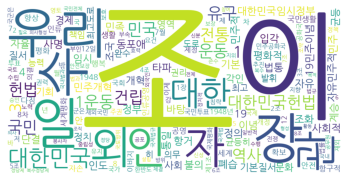

In [41]:
font_path = 'path = "/usr/share/fonts/NanumGothic.ttf' # 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
wc = WordCloud(width = 1000, height = 500, background_color="white",font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()

출처 : 
- [KoNLPy:파이썬 한국어 NLP](https://konlpy-ko.readthedocs.io/ko/v0.4.3/#)
- [데이터 사이언스 스쿨 : KoNLPy 한국어 처리 패키지](https://datascienceschool.net/03%20machine%20learning/03.01.02%20KoNLPy%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html)